**Content:**
1. [Introduction to Python:](#1)
    1. [Matplotlib](#2)
    1. [Dictionaries ](#3)
    1. [Pandas](#4)
    1. [Logic, control flow and filtering](#5)
    1. [Loop data structures](#6)
1. [Python Data Science Toolbox:](#7)
    1. [User defined function](#8)
    1. [Scope](#9)
    1. [Nested function](#10)
    1. [Default and flexible arguments](#11)
    1. [Lambda function](#12)
    1. [Anonymous function](#13)
    1. [Iterators](#14)
    1. [List comprehension](#15)
1. [Cleaning Data](#16)
    1. [Diagnose data for cleaning](#17)
    1. [Exploratory data analysis](#18)
    1. [Visual exploratory data analysis](#19)
    1. [Tidy data](#20)
    1. [Pivoting data](#21)
    1. [Concatenating data](#22)
    1. [Data types](#23)
    1. [Missing data and testing with assert](#24)
1. [Pandas Foundation](#25)
    1. [Review of pandas](#26)
    1. [Building data frames from scratch](#27)
    1. [Visual exploratory data analysis](#28)
    1. [Statistical explatory data analysis](#29)
    1. [Indexing pandas time series](#30)
    1. [Resampling pandas time series](#31)
1. [Manipulating Data Frames with Pandas](#32)
    1. [Indexing data frames](#33)
    1. [Slicing data frames](#34)
    1. [Filtering data frames](#35)
    1. [Transforming data frames](#36)
    1. [Index objects and labeled data](#37)
    1. [Hierarchical indexing](#38)
    1. [Pivoting data frames](#39)
    1. [Stacking and unstacking data frames](#40)
    1. [Melting data frames](#41)
    1. [Categoricals and groupby](#42)

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

In [3]:
data = pd.read_csv('data/pokemon.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


#### Note

- İki ya da daha fazla feature arasında <b>correlation</b>'ı 1'e yakınsa o featurelar birbiriyle ilişkisi(doğru orantılı) de o kadar fazladır.
- Sp. Def ile Defense birbirlerine ortalama olarak yakın denebilir. 

- Speed ile Generation 0'a yakın olduğu için birbirlerine etkisi yoktur.
- Eğer iki ya da daha fazla feature arasında <b>correlation</b>'ı -1'e yakınsa o featurelar birbiriyle ilişkisi ters orantılıdır.



In [6]:
data.corr() 

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


### **plt.subplots()**, bir **figure** ve **axes** object(s) return ettiği için **fig, ax** şeklinde iki değere atanır.

- **annot**: tablo karelerinde sayıları gösterir. 
- **linewiths**: sütunlar arasındaki kalınlık.

- **fmt**: tablodaki sayının, virgülden sonra kaç basamak olacağı



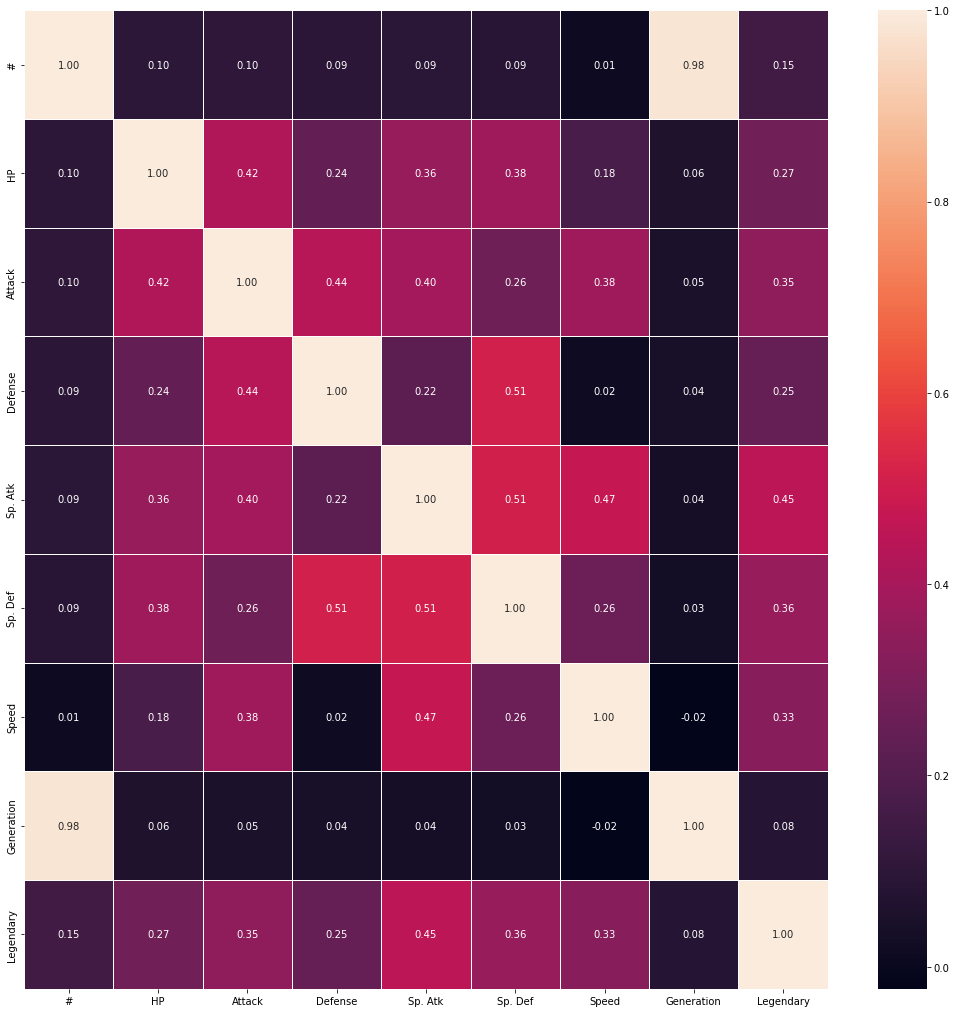

In [12]:
#correlation map
fig, ax = plt.subplots(figsize=(18, 18)) 
# fig = plt.figure()
# ax = fig.add_subplot(figsize=(18, 18)) # şeklinde de yazılabilir.
sns.heatmap(data.corr(), annot = True, linewidths = .5, fmt = '.2f', ax = ax) 
plt.show() # çalıştırınca bir yazı print ediyor, onu silmek için.

In [14]:
data.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [18]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

<a id="1"></a> <br>
# 1. INTRODUCTION TO PYTHON

<a id="2"></a> <br>
### MATPLOTLIB
Matplot is a python library that help us to plot data. The easiest and basic plots are **line, scatter and histogram** plots.
* **Line plot** is better when **x axis** is **time**.
* **Scatter** is better when there is **correlation** between **two variables**.
* **Histogram** is better when we need to see **distribution** of **numerical data**.
* **Customization**: Colors,labels,thickness of line, title, opacity, grid, figsize, ticks of axis and linestyle  

In [21]:
%matplotlib qt5
# Line Plot
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
data.Speed.plot(kind = 'line', color = 'g', label = 'Speed',linewidth=1,alpha = 0.5,grid = True, linestyle = ':') # g=green
data.Defense.plot(color = 'r',label = 'Defense',linewidth=1, alpha = 0.5,grid = True, linestyle = '-.') #color = "red"
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis - pokemons')              # label = name of label
plt.ylabel('y axis - Speed And Defense')
plt.title('Line Plot')            # title = title of plot
plt.show()

In [33]:
data.Name[0] # Bulbasaur

'Bulbasaur'

## Note
- Scatter plotta x ve y değerleri için sütun isimlerinin aynısı yazılmalıdır.

- İkinci yöntem: ```plt.scatter(data.Attack, data.Defense, color = "red", alpha = 0.5)```

In [36]:
%matplotlib qt5
# Scatter Plot (CORRELATION İÇİN ÇOK UYGUN)
# x = attack, y = defense
data.plot(kind='scatter', x='Attack', y='Defense', alpha = 0.5,color = 'red')
plt.xlabel('Attack')              # label = name of label
plt.ylabel('Defence')
plt.title('Attack Defense Scatter Plot')            # title = title of plot
plt.show()

In [55]:
# Histogram
# bins = number of bar in figure
data.Speed.plot(kind = 'hist',bins = 50, figsize = (7,7), color="g") # Hızı 100 olan pokemonların sayısı 40'tır.
plt.xlabel("Speed")
plt.show()

In [41]:
# clf() = cleans it up again you can start a fresh
data.Speed.plot(kind = 'hist',bins = 50)
plt.clf()
# We cannot see plot due to clf()

<a id="3"></a> <br>
### DICTIONARY
Why we need dictionary?
* It has 'key' and 'value'
* Faster than lists
<br>
What is key and value. Example:
* dictionary = {'spain' : 'madrid'}
* Key is spain.
* Values is madrid.
<br>
<br>**It's that easy.**
<br>Lets practice some other properties like keys(), values(), update, add, check, remove key, remove all entries and remove dicrionary.

In [ ]:
#create dictionary and look its keys and values
dictionary = {'spain' : 'madrid','usa' : 'vegas'}
print(dictionary.keys())
print(dictionary.values())

In [ ]:
# Keys have to be immutable objects like string, boolean, float, integer or tubles
# List is not immutable
# Keys are unique
dictionary['spain'] = "barcelona"    # update existing entry
print(dictionary)
dictionary['france'] = "paris"       # Add new entry
print(dictionary)
del dictionary['spain']              # remove entry with key 'spain'
print(dictionary)
print('france' in dictionary)        # check include or not
dictionary.clear()                   # remove all entries in dict
print(dictionary)


In [ ]:
# In order to run all code you need to take comment this line
# del dictionary         # delete entire dictionary     
print(dictionary)       # it gives error because dictionary is deleted

<a id="4"></a> <br>
### PANDAS
What we need to know about pandas?
* CSV: comma - separated values



In [ ]:
data = pd.read_csv('../input/pokemon.csv')


In [ ]:
series = data['Defense']        # data['Defense'] = series
print(type(series))
data_frame = data[['Defense']]  # data[['Defense']] = data frame
print(type(data_frame))


<a id="5"></a> <br>
Before continue with pandas,   we need to learn **logic, control flow** and **filtering.**
<br>Comparison operator:  ==, <, >, <=
<br>Boolean operators: and, or ,not
<br> Filtering pandas

In [ ]:
# Comparison operator
print(3 > 2)
print(3!=2)
# Boolean operators
print(True and False)
print(True or False)

In [ ]:
# 1 - Filtering Pandas data frame
x = data['Defense']>200     # There are only 3 pokemons who have higher defense value than 200
data[x]

In [ ]:
# 2 - Filtering pandas with logical_and
# There are only 2 pokemons who have higher defence value than 2oo and higher attack value than 100
data[np.logical_and(data['Defense']>200, data['Attack']>100 )]

In [ ]:
# This is also same with previous code line. Therefore we can also use '&' for filtering.
data[(data['Defense']>200) & (data['Attack']>100)]

<a id="6"></a> <br>
### WHILE and FOR LOOPS
We will learn most basic while and for loops

In [ ]:
# Stay in loop if condition( i is not equal 5) is true
i = 0
while i != 5 :
    print('i is: ',i)
    i +=1 
print(i,' is equal to 5')

In [ ]:
# Stay in loop if condition( i is not equal 5) is true
lis = [1,2,3,4,5]
for i in lis:
    print('i is: ',i)
print('')

# Enumerate index and value of list
# index : value = 0:1, 1:2, 2:3, 3:4, 4:5
for index, value in enumerate(lis):
    print(index," : ",value)
print('')   

# For dictionaries
# We can use for loop to achive key and value of dictionary. We learnt key and value at dictionary part.
dictionary = {'spain':'madrid','france':'paris'}
for key,value in dictionary.items():
    print(key," : ",value)
print('')

# For pandas we can achieve index and value
for index,value in data[['Attack']][0:1].iterrows():
    print(index," : ",value)



In this part, you learn:
* how to import csv file
* plotting line,scatter and histogram
* basic dictionary features
* basic pandas features like filtering that is actually something always used and main for being data scientist
* While and for loops

<a id="7"></a> <br>
# 2. PYTHON DATA SCIENCE TOOLBOX

<a id="8"></a> <br>
### USER DEFINED FUNCTION
What we need to know about functions:
* docstrings: documentation for functions. Example:
<br>for f():
    <br>"""This is docstring for documentation of function f"""
* tuble: sequence of immutable python objects. 
<br>cant modify values
<br>tuble uses paranthesis like tuble = (1,2,3)
<br>unpack tuble into several variables like a,b,c = tuble
    

In [ ]:
# example of what we learn above
def tuble_ex():
    """ return defined t tuble"""
    t = (1,2,3)
    return t
a,b,c = tuble_ex()
print(a,b,c)

<a id="9"></a> <br>
### SCOPE
What we need to know about scope:
* global: defined main body in script
* local: defined in a function
* built in scope: names in predefined built in scope module such as print, len
<br><br>Lets make some basic examples

In [ ]:
# guess print what
x = 2
def f():
    x = 3
    return x
print(x)      # x = 2 global scope
print(f())    # x = 3 local scope

In [ ]:
# What if there is no local scope
x = 5
def f():
    y = 2*x        # there is no local scope x
    return y
print(f())         # it uses global scope x
# First local scopesearched, then global scope searched, if two of them cannot be found lastly built in scope searched.

In [ ]:
# How can we learn what is built in scope
import builtins
dir(builtins)

<a id="10"></a> <br>
### NESTED FUNCTION
* function inside function.
* There is a LEGB rule that is search local scope, enclosing function, global and built in scopes, respectively.

In [ ]:
#nested function
def square():
    """ return square of value """
    def add():
        """ add two local variable """
        x = 2
        y = 3
        z = x + y
        return z
    return add()**2
print(square())    

<a id="11"></a> <br>
### DEFAULT and FLEXIBLE ARGUMENTS
* Default argument example:
<br> def f(a, b=1):
        """ b = 1 is default argument"""
* Flexible argument example:
<br> def f(*args):
       """ *args can be one or more"""
<br>def f(** kwargs)
       """ **kwargs is a dictionary"""
       
<br><br> lets write some code to practice  

In [ ]:
# default arguments
def f(a, b = 1, c = 2):
    y = a + b + c
    return y
print(f(5))
# what if we want to change default arguments
print(f(5,4,3))

In [ ]:
# flexible arguments *args
def f(*args):
    for i in args:
        print(i)
f(1)
print("")
f(1,2,3,4)
# flexible arguments **kwargs that is dictionary
def f(**kwargs):
    """ print key and value of dictionary"""
    for key, value in kwargs.items():               # If you do not understand this part turn for loop part and look at dictionary in for loop
        print(key, " ", value)
f(country = 'spain', capital = 'madrid', population = 123456)

<a id="12"></a> <br>
### LAMBDA FUNCTION
Faster way of writing function

In [ ]:
# lambda function
square = lambda x: x**2     # where x is name of argument
print(square(4))
tot = lambda x,y,z: x+y+z   # where x,y,z are names of arguments
print(tot(1,2,3))

<a id="13"></a> <br>
### ANONYMOUS FUNCTİON
Like lambda function but it can take more than one arguments.
* map(func,seq) : applies a function to all the items in a list


In [ ]:
number_list = [1,2,3]
y = map(lambda x:x**2,number_list)
print(list(y))

<a id="14"></a> <br>
### ITERATORS
* iterable is an object that can return an iterator
* iterable: an object with an associated iter() method
<br> example: list, strings and dictionaries
* iterator: produces next value with next() method

In [ ]:
# iteration example
name = "ronaldo"
it = iter(name)
print(next(it))    # print next iteration
print(*it)         # print remaining iteration


zip(): zip lists

In [ ]:
# zip example
list1 = [1,2,3,4]
list2 = [5,6,7,8]
z = zip(list1,list2)
print(z)
z_list = list(z)
print(z_list)

In [ ]:
un_zip = zip(*z_list)
un_list1,un_list2 = list(un_zip) # unzip returns tuble
print(un_list1)
print(un_list2)
print(type(un_list2))

<a id="15"></a> <br>
### LIST COMPREHENSİON
**One of the most important topic of this kernel**
<br>We use list comprehension for data analysis often. 
<br> list comprehension: collapse for loops for building lists into a single line
<br>Ex: num1 = [1,2,3] and we want to make it num2 = [2,3,4]. This can be done with for loop. However it is  unnecessarily long. We can make it one line code that is list comprehension.

In [ ]:
# Example of list comprehension
num1 = [1,2,3]
num2 = [i + 1 for i in num1 ]
print(num2)

[i + 1 for i in num1 ]: list of comprehension
<br> i +1: list comprehension syntax
<br> for i in num1: for loop syntax
<br> i: iterator
<br> num1: iterable object

In [ ]:
# Conditionals on iterable
num1 = [5,10,15]
num2 = [i**2 if i == 10 else i-5 if i < 7 else i+5 for i in num1]
print(num2)

In [ ]:
# lets return pokemon csv and make one more list comprehension example
# lets classify pokemons whether they have high or low speed. Our threshold is average speed.
threshold = sum(data.Speed)/len(data.Speed)
data["speed_level"] = ["high" if i > threshold else "low" for i in data.Speed]
data.loc[:10,["speed_level","Speed"]] # we will learn loc more detailed later

Up to now, you learn 
* User defined function 
* Scope
* Nested function
* Default and flexible arguments
* Lambda function
*  Anonymous function
*  Iterators
* List comprehension


<a id="16"></a> <br>
# 3.CLEANING DATA

<a id="17"></a> <br>
### DIAGNOSE DATA for CLEANING
We need to diagnose and clean data before exploring.
<br>Unclean data:
* Column name inconsistency like upper-lower case letter or space between words
* missing data
* different language

<br> We will use head, tail, columns, shape and info methods to diagnose data


In [ ]:
data = pd.read_csv('../input/pokemon.csv')
data.head()  # head shows first 5 rows

In [ ]:
# tail shows last 5 rows
data.tail()

In [ ]:
# columns gives column names of features
data.columns

In [ ]:
# shape gives number of rows and columns in a tuble
data.shape

In [ ]:
# info gives data type like dataframe, number of sample or row, number of feature or column, feature types and memory usage
data.info()

<a id="18"></a> <br>
### EXPLORATORY DATA ANALYSIS
value_counts(): Frequency counts
<br>outliers: the value that is considerably higher or lower from rest of the data
* Lets say value at 75% is Q3 and value at 25% is Q1. 
* Outlier are smaller than Q1 - 1.5(Q3-Q1) and bigger than Q3 + 1.5(Q3-Q1). (Q3-Q1) = IQR
<br>We will use describe() method. Describe method includes:
* count: number of entries
* mean: average of entries
* std: standart deviation
* min: minimum entry
* 25%: first quantile
* 50%: median or second quantile
* 75%: third quantile
* max: maximum entry

<br> What is quantile?

* 1,4,5,6,8,9,11,12,13,14,15,16,17
* The median is the number that is in **middle** of the sequence. In this case it would be 11.

* The lower quartile is the median in between the smallest number and the median i.e. in between 1 and 11, which is 6.
* The upper quartile, you find the median between the median and the largest number i.e. between 11 and 17, which will be 14 according to the question above.

In [ ]:
# For example lets look frequency of pokemom types
print(data['Type 1'].value_counts(dropna =False))  # if there are nan values that also be counted
# As it can be seen below there are 112 water pokemon or 70 grass pokemon

In [ ]:
# For example max HP is 255 or min defense is 5
data.describe() #ignore null entries

<a id="19"></a> <br>
### VISUAL EXPLORATORY DATA ANALYSIS
* Box plots: visualize basic statistics like outliers, min/max or quantiles

In [ ]:
# For example: compare attack of pokemons that are legendary  or not
# Black line at top is max
# Blue line at top is 75%
# Red line is median (50%)
# Blue line at bottom is 25%
# Black line at bottom is min
# There are no outliers
data.boxplot(column='Attack',by = 'Legendary')

<a id="20"></a> <br>
### TIDY DATA
We tidy data with melt().
Describing melt is confusing. Therefore lets make example to understand it.


In [ ]:
# Firstly I create new data from pokemons data to explain melt nore easily.
data_new = data.head()    # I only take 5 rows into new data
data_new

In [ ]:
# lets melt
# id_vars = what we do not wish to melt
# value_vars = what we want to melt
melted = pd.melt(frame=data_new,id_vars = 'Name', value_vars= ['Attack','Defense'])
melted

<a id="21"></a> <br>
### PIVOTING DATA
Reverse of melting.

In [ ]:
# Index is name
# I want to make that columns are variable
# Finally values in columns are value
melted.pivot(index = 'Name', columns = 'variable',values='value')

<a id="22"></a> <br>
### CONCATENATING DATA
We can concatenate two dataframe 

In [ ]:
# Firstly lets create 2 data frame
data1 = data.head()
data2= data.tail()
conc_data_row = pd.concat([data1,data2],axis =0,ignore_index =True) # axis = 0 : adds dataframes in row
conc_data_row

In [ ]:
data1 = data['Attack'].head()
data2= data['Defense'].head()
conc_data_col = pd.concat([data1,data2],axis =1) # axis = 0 : adds dataframes in row
conc_data_col

<a id="23"></a> <br>
### DATA TYPES
There are 5 basic data types: object(string),booleab,  integer, float and categorical.
<br> We can make conversion data types like from str to categorical or from int to float
<br> Why is category important: 
* make dataframe smaller in memory 
* can be utilized for anlaysis especially for sklear(we will learn later)

In [ ]:
data.dtypes

In [ ]:
# lets convert object(str) to categorical and int to float.
data['Type 1'] = data['Type 1'].astype('category')
data['Speed'] = data['Speed'].astype('float')

In [ ]:
# As you can see Type 1 is converted from object to categorical
# And Speed ,s converted from int to float
data.dtypes

<a id="24"></a> <br>
### MISSING DATA and TESTING WITH ASSERT
If we encounter with missing data, what we can do:
* leave as is
* drop them with dropna()
* fill missing value with fillna()
* fill missing values with test statistics like mean
<br>Assert statement: check that you can turn on or turn off when you are done with your testing of the program

In [ ]:
# Lets look at does pokemon data have nan value
# As you can see there are 800 entries. However Type 2 has 414 non-null object so it has 386 null object.
data.info()

In [ ]:
# Lets chech Type 2
data["Type 2"].value_counts(dropna =False)
# As you can see, there are 386 NAN value

In [ ]:
# Lets drop nan values
data1=data   # also we will use data to fill missing value so I assign it to data1 variable
data1["Type 2"].dropna(inplace = True)  # inplace = True means we do not assign it to new variable. Changes automatically assigned to data
# So does it work ?

In [ ]:
#  Lets check with assert statement
# Assert statement:
assert 1==1 # return nothing because it is true

In [ ]:
# In order to run all code, we need to make this line comment
# assert 1==2 # return error because it is false

In [ ]:
assert  data['Type 2'].notnull().all() # returns nothing because we drop nan values

In [ ]:
data["Type 2"].fillna('empty',inplace = True)


In [ ]:
assert  data['Type 2'].notnull().all() # returns nothing because we do not have nan values

In [ ]:
# # With assert statement we can check a lot of thing. For example
# assert data.columns[1] == 'Name'
# assert data.Speed.dtypes == np.int

In this part, you learn:
* Diagnose data for cleaning
* Exploratory data analysis
* Visual exploratory data analysis
* Tidy data
* Pivoting data
* Concatenating data
* Data types
* Missing data and testing with assert

<a id="25"></a> <br>
# 4. PANDAS FOUNDATION 

<a id="26"></a> <br>
### REVİEW of PANDAS
As you notice, I do not give all idea in a same time. Although, we learn some basics of pandas, we will go deeper in pandas.
* single column = series
* NaN = not a number
* dataframe.values = numpy


<a id="27"></a> <br>
### BUILDING DATA FRAMES FROM SCRATCH
* We can build data frames from csv as we did earlier.
* Also we can build dataframe from dictionaries
    * zip() method: This function returns a list of tuples, where the i-th tuple contains the i-th element from each of the argument sequences or iterables.
* Adding new column
* Broadcasting: Create new column and assign a value to entire column

In [ ]:
# data frames from dictionary
country = ["Spain","France"]
population = ["11","12"]
list_label = ["country","population"]
list_col = [country,population]
zipped = list(zip(list_label,list_col))
data_dict = dict(zipped)
df = pd.DataFrame(data_dict)
df

In [ ]:
# Add new columns
df["capital"] = ["madrid","paris"]
df

In [ ]:
# Broadcasting
df["income"] = 0 #Broadcasting entire column
df

<a id="28"></a> <br>
### VISUAL EXPLORATORY DATA ANALYSIS
* Plot
* Subplot
* Histogram:
    * bins: number of bins
    * range(tuble): min and max values of bins
    * normed(boolean): normalize or not
    * cumulative(boolean): compute cumulative distribution

In [ ]:
# Plotting all data 
data1 = data.loc[:,["Attack","Defense","Speed"]]
data1.plot()
# it is confusing

In [ ]:
# subplots
data1.plot(subplots = True)
plt.show()

In [ ]:
# scatter plot  
data1.plot(kind = "scatter",x="Attack",y = "Defense")
plt.show()

In [ ]:
# hist plot  
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),normed = True)

In [ ]:
# histogram subplot with non cumulative and cumulative
fig, axes = plt.subplots(nrows=2,ncols=1)
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),normed = True,ax = axes[0])
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),normed = True,ax = axes[1],cumulative = True)
plt.savefig('graph.png')
plt

<a id="29"></a> <br>
### STATISTICAL EXPLORATORY DATA ANALYSIS
I already explained it at previous parts. However lets look at one more time.
* count: number of entries
* mean: average of entries
* std: standart deviation
* min: minimum entry
* 25%: first quantile
* 50%: median or second quantile
* 75%: third quantile
* max: maximum entry

In [ ]:
data.describe()

<a id="30"></a> <br>
### INDEXING PANDAS TIME SERIES
* datetime = object
* parse_dates(boolean): Transform date to ISO 8601 (yyyy-mm-dd hh:mm:ss ) format

In [ ]:
time_list = ["1992-03-08","1992-04-12"]
print(type(time_list[1])) # As you can see date is string
# however we want it to be datetime object
datetime_object = pd.to_datetime(time_list)
print(type(datetime_object))

In [ ]:
# close warning
import warnings
warnings.filterwarnings("ignore")
# In order to practice lets take head of pokemon data and add it a time list
data2 = data.head()
date_list = ["1992-01-10","1992-02-10","1992-03-10","1993-03-15","1993-03-16"]
datetime_object = pd.to_datetime(date_list)
data2["date"] = datetime_object
# lets make date as index
data2= data2.set_index("date")
data2 

In [ ]:
# Now we can select according to our date index
print(data2.loc["1993-03-16"])
print(data2.loc["1992-03-10":"1993-03-16"])

<a id="31"></a> <br>
### RESAMPLING PANDAS TIME SERIES
* Resampling: statistical method over different time intervals
    * Needs string to specify frequency like "M" = month or "A" = year
* Downsampling: reduce date time rows to slower frequency like from daily to weekly
* Upsampling: increase date time rows to faster frequency like from daily to hourly
* Interpolate: Interpolate values according to different methods like ‘linear’, ‘time’ or index’ 
    * https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.interpolate.html


In [ ]:
# We will use data2 that we create at previous part
data2.resample("A").mean()

In [ ]:
# Lets resample with month
data2.resample("M").mean()
# As you can see there are a lot of nan because data2 does not include all months

In [ ]:
# In real life (data is real. Not created from us like data2) we can solve this problem with interpolate
# We can interpolete from first value
data2.resample("M").first().interpolate("linear")

In [ ]:
# Or we can interpolate with mean()
data2.resample("M").mean().interpolate("linear")

<a id="32"></a> <br>
# MANIPULATING DATA FRAMES WITH PANDAS

<a id="33"></a> <br>
### INDEXING DATA FRAMES
* Indexing using square brackets
* Using column attribute and row label
* Using loc accessor
* Selecting only some columns

In [ ]:
# read data
data = pd.read_csv('../input/pokemon.csv')
data= data.set_index("#")
data.head()

In [ ]:
# indexing using square brackets
data["HP"][1]

In [ ]:
# using column attribute and row label
data.HP[1]

In [ ]:
# using loc accessor
data.loc[1,["HP"]]

In [ ]:
# Selecting only some columns
data[["HP","Attack"]]

<a id="34"></a> <br>
### SLICING DATA FRAME
* Difference between selecting columns
    * Series and data frames
* Slicing and indexing series
* Reverse slicing 
* From something to end

In [ ]:
# Difference between selecting columns: series and dataframes
print(type(data["HP"]))     # series
print(type(data[["HP"]]))   # data frames

In [ ]:
# Slicing and indexing series
data.loc[1:10,"HP":"Defense"]   # 10 and "Defense" are inclusive

In [ ]:
# Reverse slicing 
data.loc[10:1:-1,"HP":"Defense"] 

In [ ]:
# From something to end
data.loc[1:10,"Speed":] 

<a id="35"></a> <br>
### FILTERING DATA FRAMES
Creating boolean series
Combining filters
Filtering column based others

In [ ]:
# Creating boolean series
boolean = data.HP > 200
data[boolean]

In [ ]:
# Combining filters
first_filter = data.HP > 150
second_filter = data.Speed > 35
data[first_filter & second_filter]

In [ ]:
# Filtering column based others
data.HP[data.Speed<15]

<a id="36"></a> <br>
### TRANSFORMING DATA
* Plain python functions
* Lambda function: to apply arbitrary python function to every element
* Defining column using other columns

In [ ]:
# Plain python functions
def div(n):
    return n/2
data.HP.apply(div)

In [ ]:
# Or we can use lambda function
data.HP.apply(lambda n : n/2)

In [ ]:
# Defining column using other columns
data["total_power"] = data.Attack + data.Defense
data.head()

<a id="37"></a> <br>
### INDEX OBJECTS AND LABELED DATA
index: sequence of label


In [ ]:
# our index name is this:
print(data.index.name)
# lets change it
data.index.name = "index_name"
data.head()

In [ ]:
# Overwrite index
# if we want to modify index we need to change all of them.
data.head()
# first copy of our data to data3 then change index 
data3 = data.copy()
# lets make index start from 100. It is not remarkable change but it is just example
data3.index = range(100,900,1)
data3.head()

In [ ]:
# We can make one of the column as index. I actually did it at the beginning of manipulating data frames with pandas section
# It was like this
# data= data.set_index("#")
# also you can use 
# data.index = data["#"]

<a id="38"></a> <br>
### HIERARCHICAL INDEXING
* Setting indexing

In [ ]:
# lets read data frame one more time to start from beginning
data = pd.read_csv('../input/pokemon.csv')
data.head()
# As you can see there is index. However we want to set one or more column to be index

In [ ]:
# Setting index : type 1 is outer type 2 is inner index
data1 = data.set_index(["Type 1","Type 2"]) 
data1.head(100)
# data1.loc["Fire","Flying"] # howw to use indexes

<a id="39"></a> <br>
### PIVOTING DATA FRAMES
* pivoting: reshape tool

In [ ]:
dic = {"treatment":["A","A","B","B"],"gender":["F","M","F","M"],"response":[10,45,5,9],"age":[15,4,72,65]}
df = pd.DataFrame(dic)
df

In [ ]:
# pivoting
df.pivot(index="treatment",columns = "gender",values="response")

<a id="40"></a> <br>
### STACKING and UNSTACKING DATAFRAME
* deal with multi label indexes
* level: position of unstacked index
* swaplevel: change inner and outer level index position

In [ ]:
df1 = df.set_index(["treatment","gender"])
df1
# lets unstack it

In [ ]:
# level determines indexes
df1.unstack(level=0)

In [ ]:
df1.unstack(level=1)

In [ ]:
# change inner and outer level index position
df2 = df1.swaplevel(0,1)
df2

<a id="41"></a> <br>
### MELTING DATA FRAMES
* Reverse of pivoting

In [ ]:
df

In [ ]:
# df.pivot(index="treatment",columns = "gender",values="response")
pd.melt(df,id_vars="treatment",value_vars=["age","response"])

<a id="42"></a> <br>
### CATEGORICALS AND GROUPBY

In [ ]:
# We will use df
df

In [ ]:
# according to treatment take means of other features
df.groupby("treatment").mean()   # mean is aggregation / reduction method
# there are other methods like sum, std,max or min

In [ ]:
# we can only choose one of the feature
df.groupby("treatment").age.max() 

In [ ]:
# Or we can choose multiple features
df.groupby("treatment")[["age","response"]].min() 

In [ ]:
df.info()
# as you can see gender is object
# However if we use groupby, we can convert it categorical data. 
# Because categorical data uses less memory, speed up operations like groupby
#df["gender"] = df["gender"].astype("category")
#df["treatment"] = df["treatment"].astype("category")
#df.info()


# CONCLUSION
Thank you for your votes and comments
<br> **MACHINE LEARNING ** https://www.kaggle.com/kanncaa1/machine-learning-tutorial-for-beginners/
<br> **DEEP LEARNING** https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners
<br> **STATISTICAL LEARNING** https://www.kaggle.com/kanncaa1/statistical-learning-tutorial-for-beginners
<br>**If you have any question or suggest, I will be happy to hear it.**